In [14]:
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import json

prediction_file = '../expr_result/im2caption_chinese_res50withgcb/predict/_2022-01-01_23-15-46/results.txt'
gt_file = '../../im2caption_data/chinese_caption/ai_challenger_caption_validation_20170910/caption_validation_annotations_20170910.json'
with open(gt_file,'r')as f:
    gt_data = json.load(f)
with open(prediction_file,'r')as f:
    pred_data = f.readlines()

gt_dict ={}
for item in gt_data:
    image_name = item['image_id']
    captions = item['caption']
    caption_list = []
    for caption in captions:
        temp = []
        for token in caption:
            temp.append(token)
        caption_list.append(temp)
    gt_dict[image_name] = caption_list

pred_dict = {}
for item in pred_data:
    item_list = item.split(' ')
    file_name = item_list[0]
    pred = item_list[1:-2]
    pred_dict[file_name] = pred

In [15]:
index = 1007
pred_name_list = []
for item in pred_dict.keys():
    pred_name_list.append(item)
image_name = pred_name_list[index]
pred_result = pred_dict[image_name]
gts_result = gt_dict[image_name.split('/')[-1]]
pred_text = ''
for item in pred_result:
    pred_text += item + ' '
gts_text = ''
for gt in gts_result:
    for item in gt:
        gts_text += item + ' '
    gts_text += '\n'



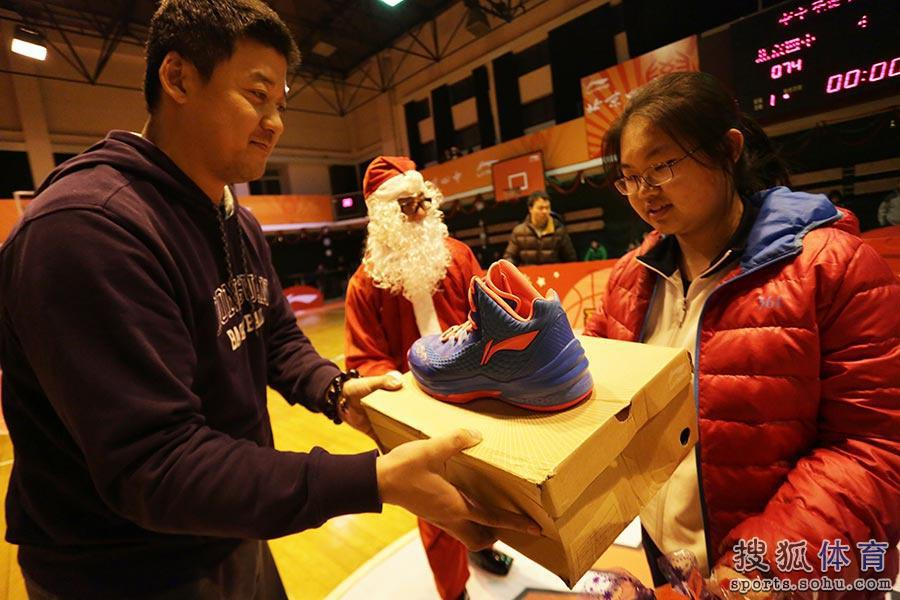

In [16]:
from IPython.display import Image as displayImage
displayImage('../'+image_name)


In [17]:
print('pred: \n',pred_text)
print('gts: \n',gts_text)
print('bleu score: ',sentence_bleu(gts_result,pred_result))

pred: 
 一 个 戴 着 眼 镜 的 女 人 和 一 个 穿 着 深 色 上 衣 的 男 人 共 同 拿 着 一 个 东 西 站 在 大 厅 里 
gts: 
 运 动 场 上 一 个 人 的 前 面 有 一 个 男 人 在 给 一 个 戴 着 眼 镜 的 女 人 递 球 鞋 
球 场 上 一 个 人 的 前 面 有 一 个 男 人 在 给 一 个 戴 眼 镜 的 女 孩 递 鞋 子 
运 动 场 上 一 个 人 前 有 一 个 穿 着 深 色 上 衣 的 男 人 在 给 一 个 戴 着 眼 镜 的 女 人 递 鞋 子 
运 动 场 上 一 个 人 前 面 有 一 个 穿 着 长 袖 的 男 人 在 递 鞋 给 一 个 戴 着 眼 镜 的 女 人 
室 内 一 个 人 旁 边 有 一 个 穿 着 卫 衣 的 人 在 给 一 个 女 人 传 递 东 西 

bleu score:  0.5632203957368781
